In [20]:
import sys
import re
import pandas as pd
import numpy as np
import sys
import os
import time
import itertools
import gc
import pickle
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import urllib.request, json
from pandas.io.json import json_normalize
from matplotlib import use
use("Agg")
import matplotlib.pyplot as plt
import csv,argparse,os,shutil
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import csv,argparse,os,shutil
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from surprise import SVD
from zomato.jumbo import Presto
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
STOP_WORDS = set(stopwords.words('english'))


from gensim.models import Word2Vec

/Users/sangam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/sangam/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sangam/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sangam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sangam/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sangam/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in 

In [43]:
a=pd.read_csv('cuisines.csv')

a = a.sort_values(['res_id','order1'])

a = a.groupby('res_id')['name'].apply(lambda x: '_'.join(x))

In [44]:
a.head()

res_id
50      Chinese_Japanese_Seafood_Burger_Fast Food_Momos
53    North Indian_Chinese_Mughlai_Burger_Fast Food_...
55                                   Chinese_Thai_Momos
60                           North Indian_Mughlai_Kebab
64                                              Italian
Name: name, dtype: object

In [38]:
'Chinese_Japanese_Seafood_Burger_Fast Food_Momos'.split('_')

['Chinese', 'Japanese', 'Seafood', 'Burger', 'Fast Food', 'Momos']

In [47]:
cuisine_data=[]
for i in a:
    cuisine_data.append(list(i.split('_')))

In [48]:
cuisine_data

[['Chinese', 'Japanese', 'Seafood', 'Burger', 'Fast Food', 'Momos'],
 ['North Indian', 'Chinese', 'Mughlai', 'Burger', 'Fast Food', 'Kebab'],
 ['Chinese', 'Thai', 'Momos'],
 ['North Indian', 'Mughlai', 'Kebab'],
 ['Italian'],
 ['Asian', 'Seafood', 'Thai', 'Chinese', 'Momos'],
 ['North Indian', 'Continental', 'European', 'Kebab'],
 ['Chinese', 'Momos'],
 ['Chinese', 'Thai', 'Seafood', 'Momos'],
 ['Chinese', 'Thai', 'Japanese'],
 ['South Indian'],
 ['Chinese', 'North Indian'],
 ['North Indian', 'Kebab'],
 ['Chinese', 'Seafood', 'Asian', 'Momos'],
 ['North Indian', 'Continental'],
 ['North Indian', 'Mughlai'],
 ['North Indian', 'Mughlai'],
 ['North Indian', 'Mughlai', 'Kebab', 'Chinese'],
 ['North Indian', 'Mughlai', 'Chinese', 'Kebab'],
 ['Chinese', 'Seafood', 'Japanese'],
 ['Pizza', 'Fast Food'],
 ['Healthy Food', 'Salad', 'Fast Food'],
 ['Healthy Food', 'Salad', 'Fast Food'],
 ['Healthy Food', 'Salad', 'Fast Food'],
 ['Healthy Food', 'Salad', 'Fast Food'],
 ['Healthy Food', 'Salad', 'F

In [197]:
model = Word2Vec(cuisine_data, size=15, window=1, min_count=5, workers=4,sg=1,cbow_mean=1)

In [199]:
model.most_similar('Chinese', topn=10)

/Users/sangam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Users/sangam/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Raw Meats', 0.7180145978927612),
 ('Bangladeshi', 0.715105414390564),
 ('Maharashtrian', 0.6686084270477295),
 ('Oriya', 0.6625065803527832),
 ('Goan', 0.6541558504104614),
 ('Bihari', 0.6468685865402222),
 ('Kashmiri', 0.6396380662918091),
 ('Mangalorean', 0.6343841552734375),
 ('Bohri', 0.6110543012619019),
 ('Konkan', 0.6105962991714478)]

In [200]:
X = model[model.wv.vocab]

/Users/sangam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


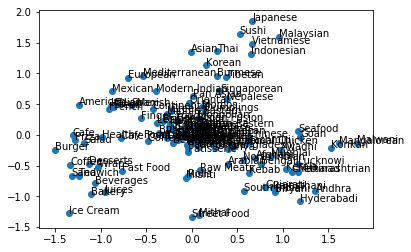

In [210]:
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [202]:
from sklearn.decomposition import PCA

In [67]:
import pickle
embedding = pickle.load( open( "cuisine_embeddings.p", "rb" ) )
embedding = pd.DataFrame.from_dict(embedding,orient='index')

In [134]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5,metric='euclidean')
neigh.fit(embedding)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [167]:
d,i = neigh.kneighbors(embedding[embedding.index=='Chinese'])

In [168]:
i

array([[141,   7,  62, 176,   3]])

In [169]:
embedding.iloc[7]

0    -0.633982
1    -0.152741
2     0.625133
3     0.606368
4    -0.458902
5     0.797998
6    -0.439052
7     0.497120
8    -0.288160
9     0.206437
10   -0.763174
11    0.654812
12   -1.312743
13   -0.619998
14    1.124893
15   -0.260210
Name: Seafood, dtype: float64